## Программа для учёта всех расходов за месяц

### 1) Импортируем все необходимые модули и библиотеки

In [1]:
import os # Модуль из стандартной библиотеки для взаимодействия с файлами и папками на жестком диске
import json # Модуль для работы с файлами формата json
import pandas as pd # Библиотека для работы с табличными данными
from datetime import datetime # Модуль для работы с датой и временем
import re # Модуль для работы с регулярными выражениями
import matplotlib.pyplot as plt # Библиотека для визуализации полученных результатов

pd.options.mode.chained_assignment = None

### 2) Создаем таблицу, в которую в дальнейшем будем запихивать данные

In [2]:
my_dict = {'Магазин': 1, 'ИНН магазина': 1, 'Дата и время покупки': 1, 'Продуктов в корзине': 1,
           'Список продуктов': 1, 'Цены продуктов': 1, 'Количество продуктов': 1,
           'Потрачено денег на продукты': 1, 'Всего потрачено': 1}

my_table = pd.DataFrame(my_dict, index=[0])

my_table.head()

,Магазин,ИНН магазина,Дата и время покупки,Продуктов в корзине,Список продуктов,Цены продуктов,Количество продуктов,Потрачено денег на продукты,Всего потрачено
0,1,1,1,1,1,1,1,1,1


### 3) Заносим в таблицу покупки, по которым не было получено чека

In [3]:
no_check = pd.read_csv("C:/Users/sermo/Google Диск/Без чека.txt", header=0, sep=';')

row = 0

for i in range(0, no_check.shape[0]):
    my_table.loc[row,'Магазин'] = no_check.loc[row,'Магазин']
    my_table.loc[row,'Список продуктов'] = no_check.loc[row,'Список продуктов']
    my_table.loc[row,'Цены продуктов'] = no_check.loc[row,'Цены продуктов']
    my_table.loc[row,'Количество продуктов'] = no_check.loc[row,'Количество продуктов']
    my_table.loc[row,'Потрачено денег на продукты'] = my_table.loc[row,'Цены продуктов'] * my_table.loc[row,'Количество продуктов']
    row += 1

my_table.head()

,Магазин,ИНН магазина,Дата и время покупки,Продуктов в корзине,Список продуктов,Цены продуктов,Количество продуктов,Потрачено денег на продукты,Всего потрачено
0,Аптека Ваша,1.0,1.0,1.0,Масло гвоздики,50.0,1.0,50.0,1.0
1,Всё для дома,NaN,NaN,NaN,Рефтамид,175.0,1.0,175.0,NaN
2,Пятёрочка,NaN,NaN,NaN,Масло оливковое,175.0,1.0,175.0,NaN
3,Пятёрочка,NaN,NaN,NaN,Другое,100.0,1.0,100.0,NaN
4,Красное&Белое,NaN,NaN,NaN,Хлеб,70.0,1.0,70.0,NaN


### 4) Заносим в таблицу покупки по чекам

In [4]:
for root, dirs, files in os.walk("C:/Users/sermo/Google Диск/Чеки"):  
    for filename in files:
        filenames = filename

with open("C:/Users/sermo/Google Диск/Чеки/"+filenames, encoding='utf-8') as f:
    data = json.load(f)
    
for k in range(0,len(data)):
    
    diff_prod = len(data[k]['items']) # Количество разных товаров
    
    for i in range(0, diff_prod):
        
        prod = data[k]['items'][i]['name'] # Список этих товаров
        price = data[k]['items'][i]['price']/100 # Цены этих товаров
        quant = data[k]['items'][i]['quantity'] # Количество этих товаров
        summa = price * quant # Сумма, потраченная на эти товары

        if 'user' in data[k]:
            store = data[k]['user'] # Название магазина
        else:
            store = 'Без названия'

        inn = data[k]['userInn'] # ИНН магазина

        date_time = datetime.fromtimestamp(data[k]['dateTime']).strftime("%d.%m.%Y %H:%M") # Дата и время покупки

        totalSum = data[k]['totalSum']/100 # Потрачено всего

        my_table.loc[row,'Магазин'] = store
        my_table.loc[row,'ИНН магазина'] = inn
        my_table.loc[row,'Дата и время покупки'] = date_time
        my_table.loc[row,'Продуктов в корзине'] = diff_prod
        my_table.loc[row,'Список продуктов'] = prod
        my_table.loc[row,'Цены продуктов'] = price
        my_table.loc[row,'Количество продуктов'] = quant
        my_table.loc[row,'Потрачено денег на продукты'] = summa
        my_table.loc[row,'Всего потрачено'] = totalSum
        
        row += 1
        
my_table.head()

,Магазин,ИНН магазина,Дата и время покупки,Продуктов в корзине,Список продуктов,Цены продуктов,Количество продуктов,Потрачено денег на продукты,Всего потрачено
0,Аптека Ваша,1,1,1.0,Масло гвоздики,50.0,1.0,50.0,1.0
1,Всё для дома,NaN,NaN,NaN,Рефтамид,175.0,1.0,175.0,NaN
2,Пятёрочка,NaN,NaN,NaN,Масло оливковое,175.0,1.0,175.0,NaN
3,Пятёрочка,NaN,NaN,NaN,Другое,100.0,1.0,100.0,NaN
4,Красное&Белое,NaN,NaN,NaN,Хлеб,70.0,1.0,70.0,NaN


### 5) По ИНН определям название магазинов, в которых товары куплены по чекам

In [5]:
stores_table = pd.DataFrame({'ИНН магазина': my_table['ИНН магазина'][no_check.shape[0]:].unique().tolist(),
                             'Название магазина': ['Магнит', 'Пятёрочка', 'Красное & Белое', 'Дикси', 'Перекресток',
                                                   'Черная кость']})

for i in range(0,len(my_table.index)):
    for j in range(0,len(stores_table.index)):
        if my_table['ИНН магазина'][i] == stores_table['ИНН магазина'][j]:
            my_table['Магазин'][i] = stores_table['Название магазина'][j]
            
my_table.head()

,Магазин,ИНН магазина,Дата и время покупки,Продуктов в корзине,Список продуктов,Цены продуктов,Количество продуктов,Потрачено денег на продукты,Всего потрачено
0,Аптека Ваша,1,1,1.0,Масло гвоздики,50.0,1.0,50.0,1.0
1,Всё для дома,NaN,NaN,NaN,Рефтамид,175.0,1.0,175.0,NaN
2,Пятёрочка,NaN,NaN,NaN,Масло оливковое,175.0,1.0,175.0,NaN
3,Пятёрочка,NaN,NaN,NaN,Другое,100.0,1.0,100.0,NaN
4,Красное&Белое,NaN,NaN,NaN,Хлеб,70.0,1.0,70.0,NaN


### 6) Дополняем список продуктов (по чекам), подкатегорий и категорий

In [6]:
my_table['Продукт'] = 1
r = r''
product = pd.read_csv("C:/Users/sermo/Google Диск/Продукты.txt", header=None, sep=';')

for t in range(0, len(my_table.index)):
    for h in range(0, len(product.index)):
        if re.search(r+product[0][h], my_table['Список продуктов'][t]):
            my_table['Продукт'][t] = product[1][h]

prod_dict = {'Птица': ['Курица', 'Индейка', 'Фарш куриный', 'Фарш индейки'],
             'Мясо': ['Говядина', 'Свинина', 'Баранина', 'Котлеты'],
             'Гарнир': ['Макароны', 'Гречка', 'Рис'],
             'Молочные продукты': ['Творог','Молоко','Сметана','Кефир', 'Сыр', 'Йогурт'],
             'Овощи': ['Помидоры', 'Огурцы', 'Морковь', 'Лук', 'Капуста'],
             'Фрукты': ['Бананы', 'Яблоки', 'Груши', 'Апельсины', 'Персики', 'Лимоны', 'Сок'],
             'Завтрак': ['Овсянка', 'Сухой завтрак'],
             'Яйца': ['Яйца'],
             'Хлеб': ['Хлеб'],
             'Снеки': ['Сухарики', 'Чипсы'],
             'Сладости': ['Вафли', 'Печенье'],
             'Фастфуд': ['Бургер'],
             'Слабоалкогольные напитки': ['Сидр', 'Пиво', 'Пивной напиток'],
             'Крепкие напитки': ['Водка', 'Ликер', 'Джин'],
             'Бакалея': ['Соусы', 'Кетчуп', 'Масло растительное', 'Чай'],
             'Аптеки': ['Масло гвоздики'],
             'Одежда': ['Шорты', 'Футболки', 'Джинсы'],
             'Спорт': ['Теннисный мяч', 'Обмотка для ракетки'],
             'Транспорт': ['Метро'],
             'Красота': ['Стрижка'],
             'Товары для дома': ['Скатерть','Лампочка'],
             'Гигиена': ['Мыло', 'Туалетная бумага'],
             'Другое': ['Посылка', 'Дубликат', 'Бегунок', 'Средство от комаров', 'Другое']}

global_dict = {'Продукты': ['Птица', 'Мясо', 'Гарнир', 'Молочные продукты', 'Овощи', 'Фрукты', 'Завтрак', 'Яйца', 'Хлеб',
                            'Бакалея'],
               'Алкоголь': ['Слабоалкогольные напитки', 'Крепкие напитки'],
               'Вредности': ['Снеки', 'Сладости', 'Фастфуд'],
               'Одежда и обувь': ['Одежда', 'Обувь'],
               'Товары для дома': ['Товары для дома'],
               'Красота': ['Красота', 'Гигиена'],
               'Здоровье': ['Аптеки', 'Спорт'],
               'Транспорт': ['Транспорт'],
               'Другое': ['Другое']}

### 7) Добавляем соответствующие подкатегории и категории в таблицу

In [7]:
my_table['Подкатегория'] = 1
for i in range(0, len(my_table)):
    for key, value in prod_dict.items():
        if any(word in my_table['Продукт'][i] for word in value):
            my_table['Подкатегория'][i] = key
            
my_table['Категория'] = 1
for i in range(0, len(my_table)):
    for key, value in global_dict.items():
        if any(word in my_table['Подкатегория'][i] for word in value):
            my_table['Категория'][i] = key
            
my_table.head()

,Магазин,ИНН магазина,Дата и время покупки,Продуктов в корзине,Список продуктов,Цены продуктов,Количество продуктов,Потрачено денег на продукты,Всего потрачено,Продукт,Подкатегория,Категория
0,Аптека Ваша,1,1,1.0,Масло гвоздики,50.0,1.0,50.0,1.0,Масло гвоздики,Аптеки,Здоровье
1,Всё для дома,NaN,NaN,NaN,Рефтамид,175.0,1.0,175.0,NaN,Средство от комаров,Другое,Другое
2,Пятёрочка,NaN,NaN,NaN,Масло оливковое,175.0,1.0,175.0,NaN,Масло растительное,Бакалея,Продукты
3,Пятёрочка,NaN,NaN,NaN,Другое,100.0,1.0,100.0,NaN,Другое,Другое,Другое
4,Красное&Белое,NaN,NaN,NaN,Хлеб,70.0,1.0,70.0,NaN,Хлеб,Хлеб,Продукты


### 8) Создаем и выводим окончательную таблицу

In [8]:
finish = my_table[['Магазин', 'Продукт','Потрачено денег на продукты','Подкатегория','Категория']]
finish.head()

,Магазин,Продукт,Потрачено денег на продукты,Подкатегория,Категория
0,Аптека Ваша,Масло гвоздики,50.0,Аптеки,Здоровье
1,Всё для дома,Средство от комаров,175.0,Другое,Другое
2,Пятёрочка,Масло растительное,175.0,Бакалея,Продукты
3,Пятёрочка,Другое,100.0,Другое,Другое
4,Красное&Белое,Хлеб,70.0,Хлеб,Продукты


In [9]:
dia = finish[['Категория','Потрачено денег на продукты']].groupby('Категория').sum()

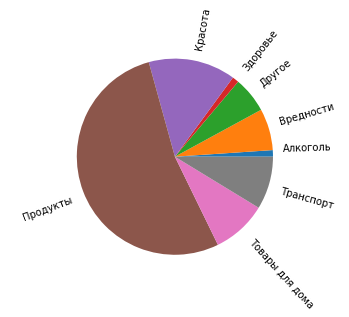

In [10]:
vals = dia['Потрачено денег на продукты'].tolist()
labels = dia.index.tolist()
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, rotatelabels=True)
ax.axis("equal")
plt.show()